In [150]:
import keras
# cargar el conjunto de datos de MNIST
mnist = keras.datasets.mnist
# Cargue la division de entrenamiento y prueba del conjunto de datos MNIST
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Label: 3
Image:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 108 232 137  33   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  33 111  77 241 254 254 195  87   2   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  27 140 117 245 254 254 254 2

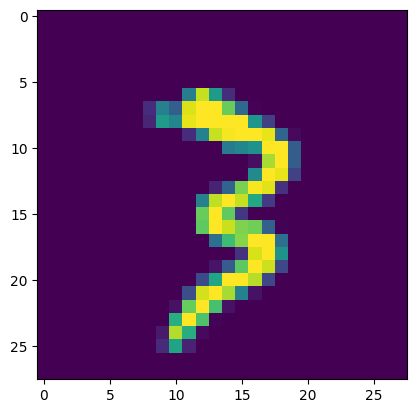

In [151]:
import numpy as np
import matplotlib.pyplot as plt
# Puedes poner aqui entre 0 y 59999
index = 25000
# Imprime la etiqueta y la imagen
np.set_printoptions(linewidth=320)
print(f'Label: {training_labels[index]}')
print(f'Image:\n {training_images[index]}')
# Visuliza la imagen
plt.imshow(training_images[index])

In [152]:
# Normalizar los valores de pixeles del tren y probar las imágenes
training_images = training_images / 255.0
test_images = test_images / 255.0

In [153]:
# Consultar el modelo de clasificación
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
])

In [154]:
# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.summary()

In [155]:
# Entrenar el modelo
history = model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3099 - accuracy: 0.9141
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1310 - accuracy: 0.9615
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0886 - accuracy: 0.9741
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0672 - accuracy: 0.9796
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0524 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0413 - accuracy: 0.9877
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0338 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0273 - accuracy: 0.9919
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0233 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.01

<Axes: >

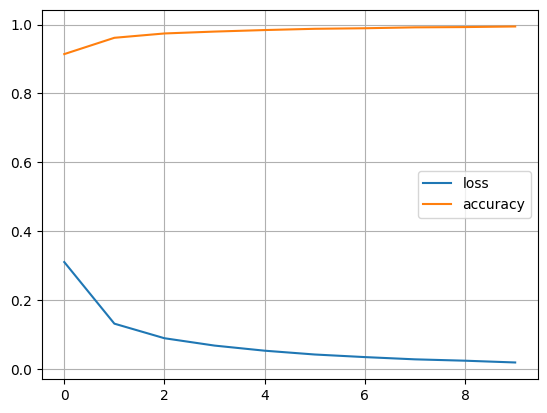

In [156]:
import pandas as pd
# Graficar el historial de entrenamiento
pd.DataFrame(history.history).plot(grid=True)


In [157]:
# Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(training_images, training_labels)
print("Perdida en el conjunto de prueba:", loss)
print("Precisión en el conjunto de prueba:", accuracy)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.0171 - accuracy: 0.9946
Perdida en el conjunto de prueba: 0.01710028201341629
Precisión en el conjunto de prueba: 0.9945833086967468


## 1. Que conjunto de datos se utiliza en entre codigo y que problema de aprendizaje automatico se aborda?


THE MNIST DATABASE

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

Aborda el problema de la clasificación

## 2. Por quées importante normalizar los calores de pixeles de las imagenes antes de entrenar el model?

Normalizar los datos permite quitarle pesos a ciertas caracteristicas para que el modelo aprende de manera homogenea sobre los datos y no aprenda enfocado en las caracteristicas con más pesos.

## 3. Que arquitectura de red neuronal se utiliza en este código y cuántas capas tiene?

Arquitectura de la Red Neuronal

* Capa de entrada: **keras.layers.Flatten(input_shape=(28, 28))**: Esta capa
aplana la entrada, transformando una imagen de 28x28 píxeles en un vector de 784 valores (28*28). Esta capa no tiene parámetros entrenables y simplemente prepara los datos de entrada para las capas densas.

* Primera capa oculta: **keras.layers.Dense(128, activation='relu')**: Esta es una capa densa con 128 neuronas y utiliza la función de activación ReLU. Esta capa tiene parámetros entrenables (pesos y sesgos).

* Capa de salida: **keras.layers.Dense(10, activation='softmax')**: Esta es la capa de salida con 10 neuronas y utiliza la función de activación softmax. Esta configuración es típica para problemas de clasificación con 10 clases. La función softmax convierte las salidas en probabilidades que suman 1, lo que es apropiado para la clasificación multiclase.

Detalle de la Arquitectura

* Número de capas: El modelo tiene un total de 3 capas.
 * Capa de entrada: 1 capa de Flatten.
 * Capa oculta: 1 capa densa con 128 neuronas y activación ReLU.
 * Capa de salida: 1 capa densa con 10 neuronas y activación softmax.


```
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
=================================================================
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
```

## 4. Cuál es la funcion de activación utilizada en la capa oculta y en la capa de salida de la red neuronal, y por qué se eligen esas funciones?

Función de las Capas y Activaciones

 * Flatten: Prepara los datos de entrada para las capas densas.
 * Dense con ReLU: Capa oculta que introduce no linealidades en el modelo y aprende características complejas.
 * Dense con Softmax: Capa de salida que genera probabilidades para cada clase.

## 5. Que función de perdida se utiliza para compilar el modelo y qué métricas se utilizan para evaluarsu rendimineto?

Función de Pérdida: sparse_categorical_crossentropy

 * Descripción: Esta función de pérdida se utiliza para problemas de clasificación multiclase. Es adecuada cuando las etiquetas son enteros (por ejemplo, 0, 1, 2, ..., 9) en lugar de vectores one-hot.
 * Cómo Funciona: Calcula la entropía cruzada entre las etiquetas verdaderas y las predicciones del modelo. La entropía cruzada mide la diferencia entre dos distribuciones de probabilidad: la verdadera (etiquetas) y la predicha (salidas del modelo).
 * Fórmula: Para una sola muestra, la entropía cruzada categórica se define como:
 $$
    loss=−log⁡(p_{yi})
 $$
 donde $$ p_{yi} $$​​ es la probabilidad predicha para la clase verdadera $$yi$$​

## 6. Cuántas épocas se utilizan para entrenar el modelo y porque se elige ese número?

Épocas: 10

Son suficientes epocas según las curvas de aprendizaje dado que más epocas implicaría una sobre entrenamiento del modelo.

## 7. Qué significa la función model.summary() y qué información proporciona?

Proporciona información del modelo relacionada a el tipo de modelo, las capas, numero de neurona por capa y distición de data entre entrenamiento y prueba.